__Tutorial 2: Linear Regression with Maximum Likelihood Estimation (MLE)__
***
By maximizing likelihood, we now view our model as a generator with a noise component that is subject to some probability distribution.
$$
y_{measured} = f(x;\theta) + \eta
$$
Here, $\eta$ is the noise component. In the linear one-dimensional case, our model is
$$
y=\theta x + \eta
$$
We will see that when we assume the noise distribution to be Gaussian, maximizing the likelihood is mathematically equivalent to minimizing the squared error.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Figure Settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

# Plotting Functions
def plot_density_image(x, y, theta, sigma=1, ax=None):
  """ Plots probability distribution of y given x, theta, and sigma

  Args:

    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.
    theta (float): Slope parameter
    sigma (float): standard deviation of Gaussian noise

  """

  # plot the probability density of p(y|x,theta)
  if ax is None:
    fig, ax = plt.subplots()

  xmin, xmax = np.floor(np.min(x)), np.ceil(np.max(x))
  ymin, ymax = np.floor(np.min(y)), np.ceil(np.max(y))
  xx = np.linspace(xmin, xmax, 50)
  yy = np.linspace(ymin, ymax, 50)

  surface = np.zeros((len(yy), len(xx)))
  for i, x_i in enumerate(xx):
    surface[:, i] = stats.norm(theta * x_i, sigma).pdf(yy)

  ax.set(xlabel='x', ylabel='y')

  return ax.imshow(surface, origin='lower', aspect='auto', vmin=0, vmax=None,
            cmap=plt.get_cmap('Wistia'),
            extent=[xmin, xmax, ymin, ymax])

We first generate some toy data and visualize the probability density function.

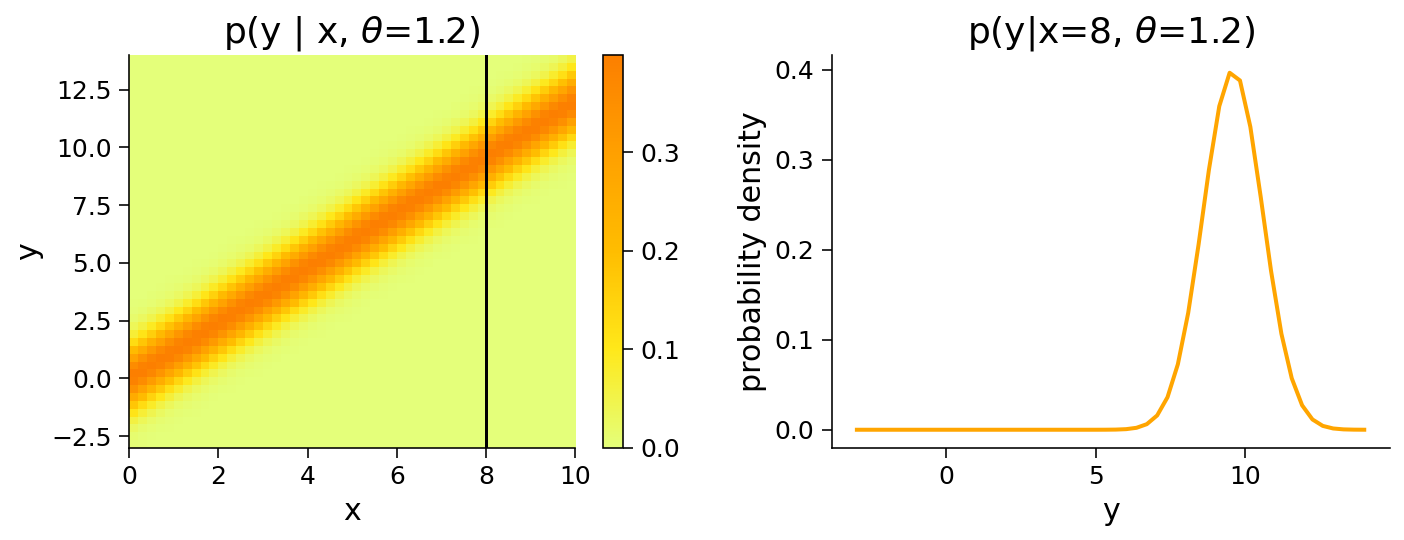

In [2]:
# Generate some simulated data
np.random.seed(121)
theta = 1.2
n_samples = 30
x = 10 * np.random.rand(n_samples) # sample from a uniform distribution over [0,10)
noise = np.random.randn(n_samples) # sample from a standard normal distribution
y = theta * x + noise

# Visualize p(y|x, theta=1.2)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

im = plot_density_image(x, y, 1.2, ax=ax1)
plt.colorbar(im, ax=ax1)
ax1.axvline(8, color='k')
ax1.set(title=r'p(y | x, $\theta$=1.2)')

# Plot pdf for given x
ylim = ax1.get_ylim()
yy = np.linspace(ylim[0], ylim[1], 50)
ax2.plot(yy, stats.norm(theta * 8, 1).pdf(yy), color='orange', linewidth=2)
ax2.set(
    title=r'p(y|x=8, $\theta$=1.2)',
    xlabel='y',
    ylabel='probability density');

The likelihood of $\theta$ given $\boldsymbol{x}$,$\boldsymbol{y}$ is:
$$
\mathcal{L}(\theta|x_i,y_i) = \prod_{i=1}^N \mathcal{L}(\theta|x_i,y_i) = \prod_{i=1}^N p(\theta|x_i,y_i)
$$
and assuming Gaussian noise,
$$
p(\theta|x_i,y_i) = \frac{1}{(2\pi)^{1/2}} e^{-\frac{1}{2}(y_i - \theta x_i)^2}
$$
The likelihood is a series product of the probalitiies each $y_i$ since each measurement is considered to be an independent event. This product will generally be a very small number, so in practice, we use the negative log likelihood for numerical stability, because it makes the series product a summation.
$$
\ln \mathcal{L}(\theta|x_i,y_i) = \ln \prod_{i=1}^N \mathcal{L}(\theta|x_i,y_i) = \sum_{i=1}^N \ln \mathcal{L}(\theta|x_i,y_i)
$$
The full derivation shows that maximizing the log likelihood results in the same analytical solution as minimizing the squared error.

0.11344443599846923


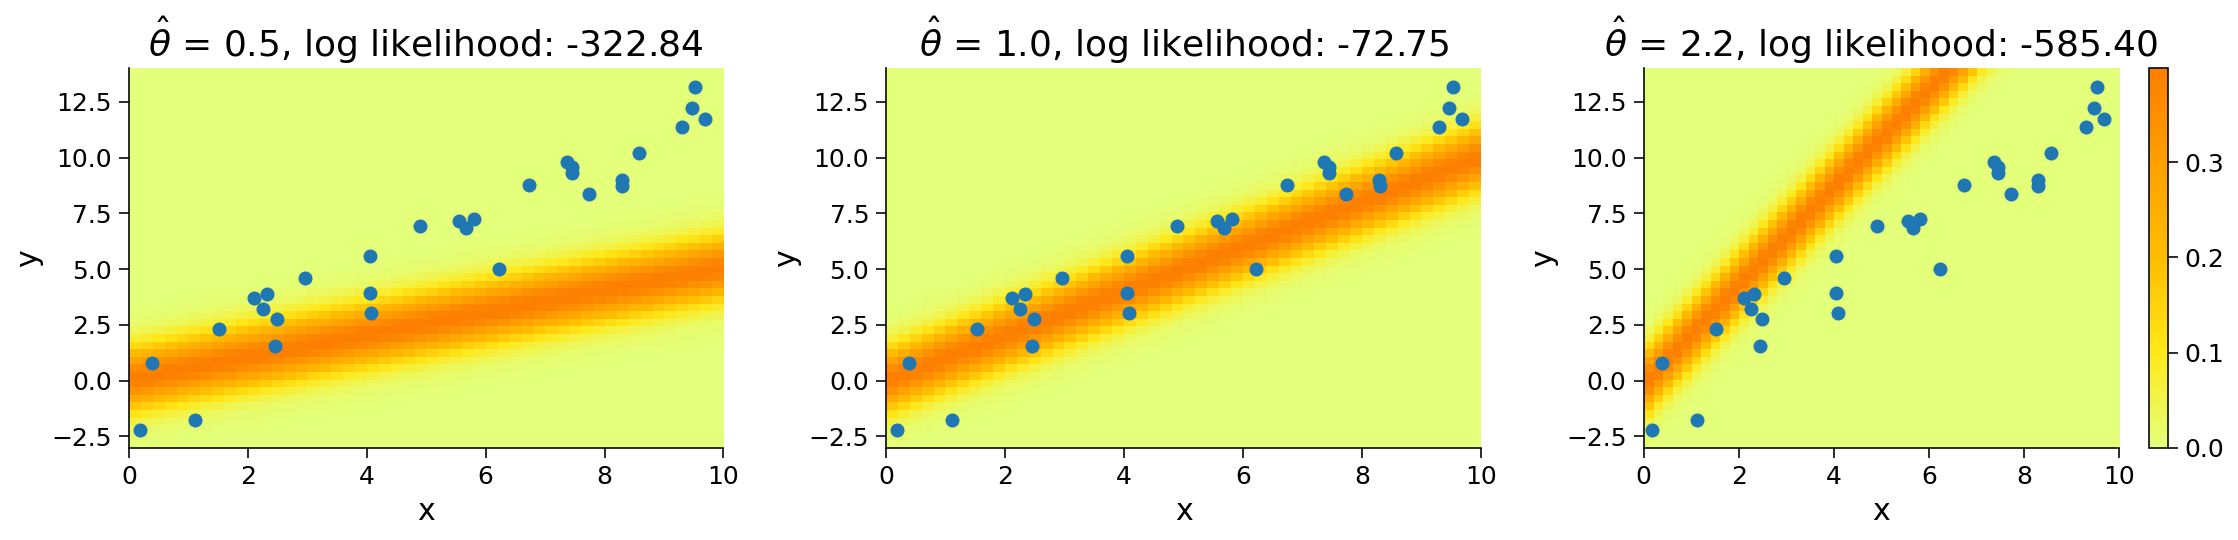

In [6]:
# Define the likelihood function L(theta|x,y) where sigma=1
def likelihood(theta_hat, x, y):
  """The likelihood function for a linear model with noise sampled from a
    Gaussian distribution with zero mean and unit variance.

  Args:
    theta_hat (float): An estimate of the slope parameter.
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.

  Returns:
    ndarray: the likelihood values for the theta_hat estimate
  """
  sigma = 1

  # Compute Gaussian likelihood
  pdf = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(y - theta_hat * x)**2 / (2 * sigma**2))

  return pdf

# Visualize three different distribution densities
theta_hats = [0.5, 1.0, 2.2]
fig, axes = plt.subplots(ncols=3, figsize=(16, 4))
for theta_hat, ax in zip(theta_hats, axes):
  ll = np.sum(np.log(likelihood(theta_hat, x, y)))  # log likelihood
  im = plot_density_image(x, y, theta_hat, ax=ax)
  ax.scatter(x, y)
  ax.set(title=fr'$\hat{{\theta}}$ = {theta_hat}, log likelihood: {ll:.2f}')
plt.colorbar(im, ax=ax);

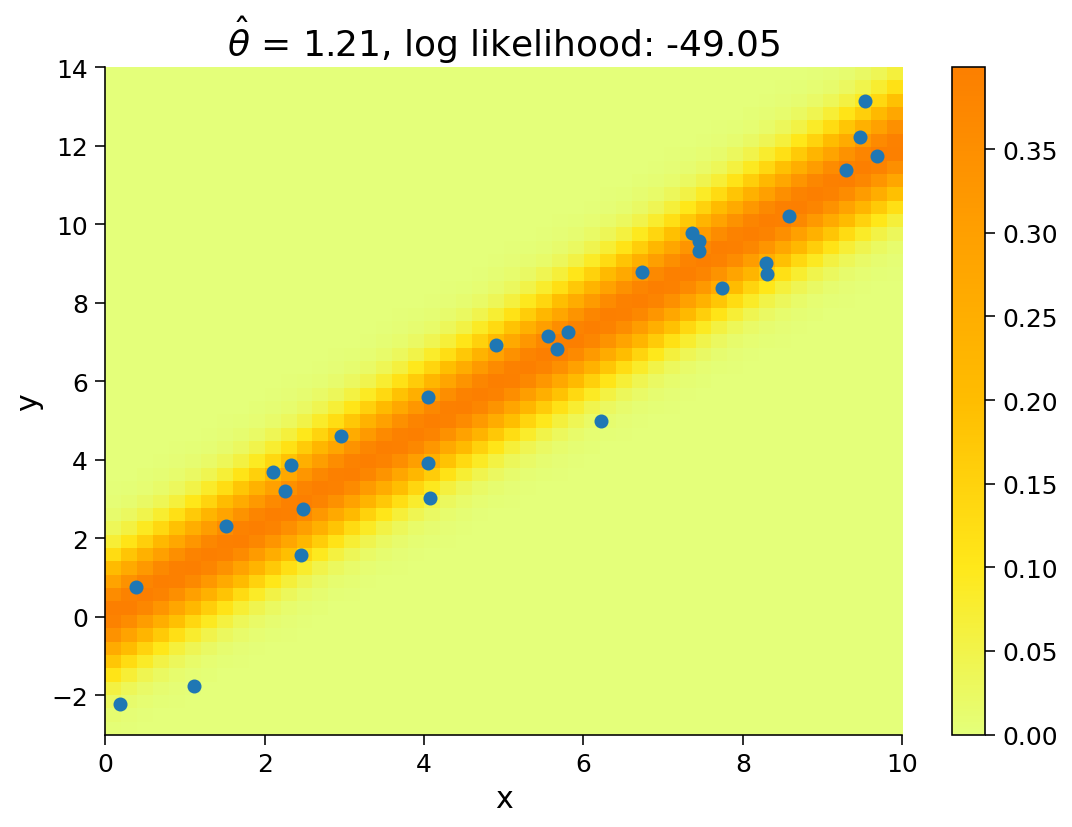

In [7]:
# Compute theta analytically
theta_hat_mle = (x @ y) / (x @ x)

# Visualize density with theta_hat_mle

# Plot the resulting distribution density
fig, ax = plt.subplots()
ll = np.sum(np.log(likelihood(theta_hat_mle, x, y))) # log likelihood
im = plot_density_image(x, y, theta_hat_mle, ax=ax)
plt.colorbar(im, ax=ax);
ax.scatter(x, y)
ax.set(title=fr'$\hat{{\theta}}$ = {theta_hat_mle:.2f}, log likelihood: {ll:.2f}');